*****EDA*****

Este análisis tiene por objetivo conocer a fondo el DataSet a fines de determinar buenos features para un modelado de ML.

****Paso 1: Importo las librerías necesarias****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from pandas.io.json import json_normalize
import ast
import json


sns.set()

import gc

****Paso 2: Cargo los Datasets****

In [2]:
movies = pd.read_csv('Movies ETL.csv',usecols= ['id','title', 'genres', 'overview', 'belongs_to_collection', 'popularity'], sep=',')

In [3]:
movies.head()

,belongs_to_collection,genres,id,overview,popularity,title
0,Toy Story Collection,"['Animation', 'Comedy', 'Family']",862.0,"Led by Woody, Andy's toys live happily in his ...",21.946943,Toy Story
1,NaN,"['Adventure', 'Fantasy', 'Family']",8844.0,When siblings Judy and Peter discover an encha...,17.015539,Jumanji
2,Grumpy Old Men Collection,"['Romance', 'Comedy']",15602.0,A family wedding reignites the ancient feud be...,11.712900,Grumpier Old Men
3,NaN,"['Comedy', 'Drama', 'Romance']",31357.0,"Cheated on, mistreated and stepped on, the wom...",3.859495,Waiting to Exhale
4,Father of the Bride Collection,['Comedy'],11862.0,Just when George Banks has recovered from his ...,8.387519,Father of the Bride Part II


****Paso 3: EDA****

In [4]:
movies.info()
#hay 30 registro sin id. Como en este caso, no vamos a usar este campo, no hay problema.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45376 entries, 0 to 45375
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4381 non-null   object 
 1   genres                 45376 non-null  object 
 2   id                     45346 non-null  float64
 3   overview               44435 non-null  object 
 4   popularity             45376 non-null  float64
 5   title                  45376 non-null  object 
dtypes: float64(2), object(4)
memory usage: 2.1+ MB


**A) Título y overview con nube de palabras**

Con el objetivo de definir un modelo de ML basado en los títulos, podría ser útil conocer si el título de la película es representativo del contenido de la misma.

Con esta finalidad, comparamos una nube de palbras que aparecen en los títulos con la nube de palabras que aparecen en los overview.

In [5]:
# Convierto a str
movies['title'] = movies['title'].astype('str')
movies['overview'] = movies['overview'].astype('str')

In [6]:
#En las siguientes variables, genero un str donde concateno todos los títulos y palabras que aparecen en el overview para luego hacer la nube de palabras.
cuerpo_titulo = ' '.join(movies['title'])
cuerpo_overview = ' '.join(movies['overview'])

In [1]:
#print(cuerpo_titulo)

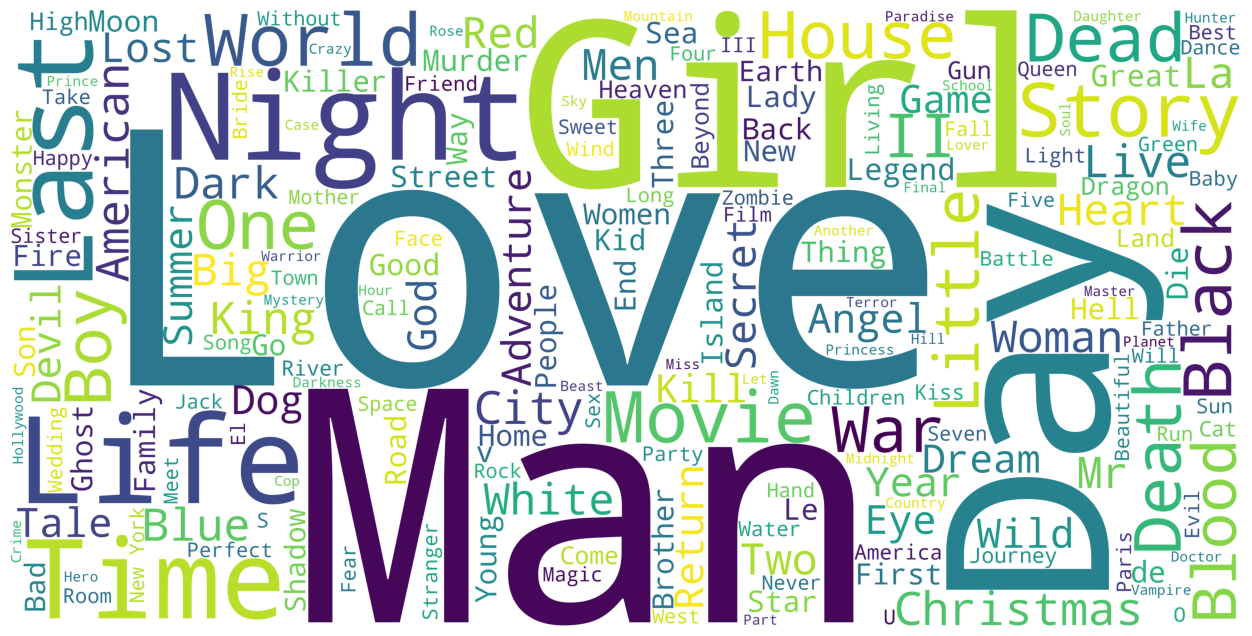

In [13]:
nube_titulos = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(cuerpo_titulo)
plt.figure(figsize=(16,8))
plt.imshow(nube_titulos)
plt.axis('off')
plt.show()
nube_titulos.to_file('Nube de palabras Titulo.png')

Las palabras que más aparecen en los títulos son 'Love' y 'Man'.
También 'Life', 'Girl', 'Day' y 'Nigth' son bastante comunes.

Ahora analizaré la nube de palabras de overview para detactar si hay alguna relación con las palabras obtenidas en el gráfico anterior.

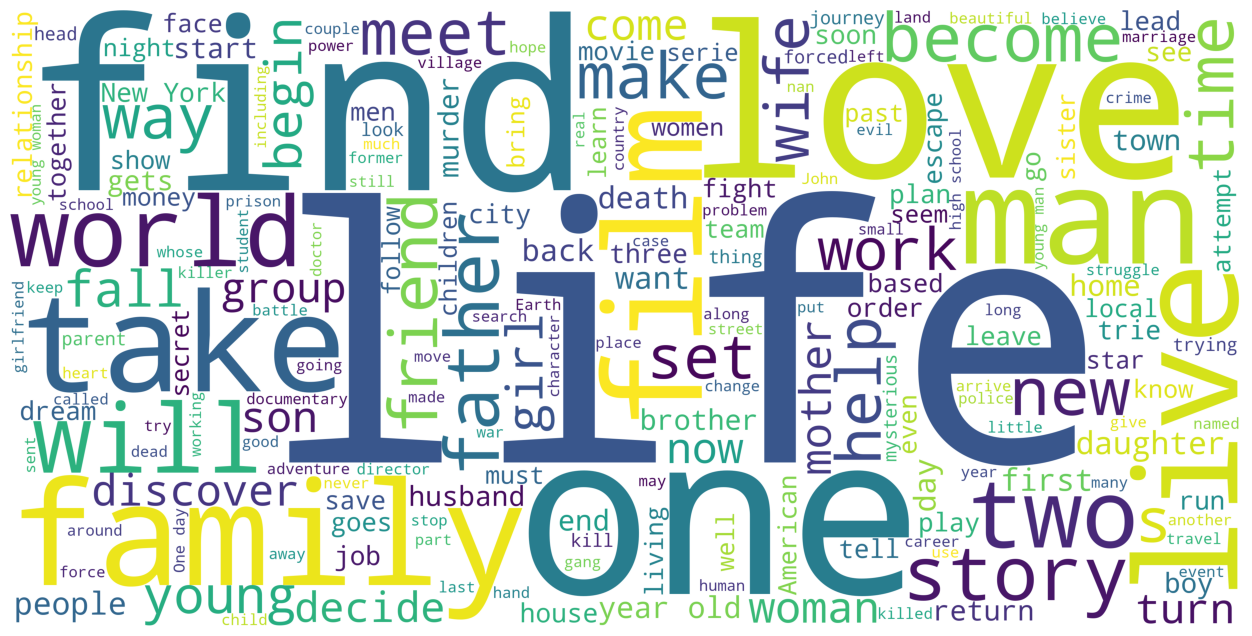

In [14]:
nube_overview = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(cuerpo_overview)
plt.figure(figsize=(16,8))
plt.imshow(nube_overview)
plt.axis('off')
plt.show()
nube_overview.to_file('Nube de palabras Overview.png')


'life' y 'find' son las palbras más comunes en los overview. Además, 'love', 'live' y 'family' también son muy populares.

***Conclusión***

Estas plabra se relacionan en cierto sentido con las palabras encotradas en el gráfico de nubes de títulos. Con lo cual, podemos concluir que, de manera general, los títulos por sí mismos son representativos de los temas que tratan las películas.

**B) Análisis de las franquicias**

Me interesa conocer el puntaje de popularidad asignado por la TDMB de cada franquicia. Podría ser útil a la hora de recomendar películas de la misma saga.

In [17]:
#Hago un DF aux eliminando los valores nulos de bellong_to_collection
df_fran = movies[movies['belongs_to_collection'].notnull()]
df_fran

,belongs_to_collection,genres,id,overview,popularity,title
0,Toy Story Collection,"['Animation', 'Comedy', 'Family']",862.0,"Led by Woody, Andy's toys live happily in his ...",21.946943,Toy Story
2,Grumpy Old Men Collection,"['Romance', 'Comedy']",15602.0,A family wedding reignites the ancient feud be...,11.712900,Grumpier Old Men
4,Father of the Bride Collection,['Comedy'],11862.0,Just when George Banks has recovered from his ...,8.387519,Father of the Bride Part II
9,James Bond Collection,"['Adventure', 'Action', 'Thriller']",710.0,James Bond must unmask the mysterious head of ...,14.686036,GoldenEye
12,Balto Collection,"['Family', 'Animation', 'Adventure']",21032.0,An outcast half-wolf risks his life to prevent...,12.140733,Balto
...,...,...,...,...,...,...
45267,The Carry On Collection,['Comedy'],24568.0,Bertram Oliphant West (also known as Bo West) ...,1.114848,Carry On Follow That Camel
45270,The Carry On Collection,['Comedy'],19307.0,Sid and Bernie keep having their amorous inten...,4.103723,Carry On Camping
45281,The Carry On Collection,['Comedy'],21251.0,Captain S. Melly takes over as the new Command...,0.846154,Carry On England
45283,DC Super Hero Girls Collection,['Animation'],460135.0,"When Supergirl, Wonder Woman, Batgirl, Bumbleb...",8.413734,LEGO DC Super Hero Girls: Brain Drain


In [18]:
#Me interesa conocer cuales son las franquicias más populares.
fran_popu = df_fran.pivot_table(index='belongs_to_collection', values='popularity', aggfunc={'popularity': ['count','mean','sum']}).reset_index()
fran_popu.sort_values(by= 'sum', ascending= False, inplace=True)
fran_popu

,belongs_to_collection,count,mean,sum
313,Despicable Me Collection,6,106.715961,640.295768
629,James Bond Collection,26,13.453502,349.791063
1599,Wonder Woman Collection,1,294.337037,294.337037
937,Pirates of the Caribbean Collection,5,53.972237,269.861183
941,Planet of the Apes (Reboot) Collection,3,87.720253,263.160759
...,...,...,...,...
803,Mikogami Trilogy / Wanderer Jôkichi,1,0.002671,0.002671
372,Eccezzziunale... veramente Collections,1,0.002538,0.002538
1009,Robotech (Samling),1,0.002001,0.002001
181,Bloodfist Collection,1,0.001950,0.001950


***Conclusión***

El top5 de colecciones más populares (ordenados por sum) son:
1) Despicable Me Collection	
2) James Bond Collection		
3) Wonder Woman Collection		
4) Pirates of the Caribbean Collection		
5) Planet of the Apes (Reboot) Collection		

**C) Popularidad: Analisis de distribución y detección de outliers**

La popularidad de cada película podría ser utilizada para ordenar las recomendaciones (Dado un título, provisto por el usuarios, se recomiendan5 películas similares ordenadas por popularidad)

En concecuencia, sería útil conocer los datos numéricos que contiene esta columna.

In [21]:
#Verifico valores NA
movies['popularity'].isna().sum()

0

In [22]:
movies['popularity'].describe()

count    45376.000000
mean         2.926458
std          6.009672
min          0.000000
25%          0.388840
50%          1.130454
75%          3.691695
max        547.488298
Name: popularity, dtype: float64

Con estos datos ya se vislumbra que puede haber algunos outliers.

Notese que el percentil 75 es 3,69. Sin embargo el máximo es 547,48 (un 14500 % por encima del percentil 75)

Vamos a profundizar un poco más en el tema.

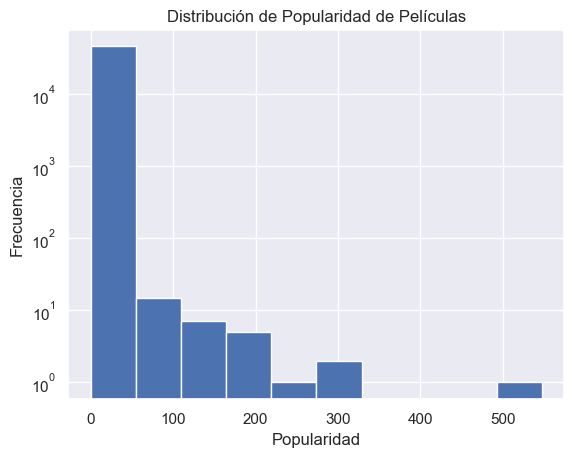

In [23]:
#Grafico en forma de histograma para detectar outlier.
movies['popularity'].plot(logy=True, kind='hist')

plt.title('Distribución de Popularidad de Películas')
plt.xlabel('Popularidad')
plt.ylabel('Frecuencia')

plt.savefig('Histograma popularidad.png', bbox_inches='tight', dpi=300)


Efectivamente, se pueden observar valores muy alejados del resto de la distribución (> 500).

Además, también se puede ver que la gran mayoría de los datos están por debajo de 50 (primer bin).

Entremos un poco más en detalle.

*¿Cuales son las películas que tienen estas popularidades tan altas?*

In [78]:
peli_popu = pd.DataFrame(movies, columns=['title', 'popularity'])
peli_popu.sort_values(by= 'popularity', ascending= False, inplace=True)
peli_popu.head(30)

,title,popularity
30665,Minions,547.488298
33316,Wonder Woman,294.337037
42151,Beauty and the Beast,287.253654
43567,Baby Driver,228.032744
24426,Big Hero 6,213.849907
26534,Deadpool,187.860492
26536,Guardians of the Galaxy Vol. 2,185.330992
14545,Avatar,185.070892
24322,John Wick,183.870374
23648,Gone Girl,154.801009


***Conclusión***

Vemos que los títulos con mayor popularidad, valores que llamabamos outliers, son películas muy conocidas que rompieron muchos record en cines y streaming. Por lo tanto, pueden ser considerados como valores atípicos pero válidos. Y, por ende, no se quitarán del dataset.